# IA340 Mini Project 
**Project Title:** Popular Baby Names in New York City from 2011-2021

## Research Question
How has the diversity of popular baby names (measured by the total count of unique names) changed over the recorded years, and which specific Ethnicity/Gender group consistently uses the widest variety of unique names?

## Dataset Documentation
- **Source:** https://catalog.data.gov/dataset/popular-baby-names
- **Description:** Popular Baby Names, in New York City, from 2011-2021
- **Time Period:** 2011-2021
- **Reason for Choice:** The chosen dataset relates to my question because looking at the diversity and amount of baby names in NYC will help to illumnate how these values have changed over the years and which demographics tend to use the widest variety of names. 

## Import

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

baby_names = pd.read_csv("s3://ia-340-2025-fall-9874yay/Popular_Baby_Names.csv")
baby_names.head()

/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/ec2-user/anaconda3/envs/python3/lib/python3.10/site-packages/fsspec/registry.py:298: UserWarning: Your installed version of s3fs is very old and known to cause
severe performance issues, see also https://github.com/dask/dask/issues/10276

To fix, you should specify a lower version bound on s3fs, or
update the current installation.

  warnings.warn(s3_msg)


,Year of Birth,Gender,Ethnicity,Child's First Name,Count,Rank
0,2011,FEMALE,HISPANIC,GERALDINE,13,75
1,2011,FEMALE,HISPANIC,GIA,21,67
2,2011,FEMALE,HISPANIC,GIANNA,49,42
3,2011,FEMALE,HISPANIC,GISELLE,38,51
4,2011,FEMALE,HISPANIC,GRACE,36,53


## Cleaning 

In [2]:
df = baby_names.copy()

print("\n--- Basic Profile: df.info() ---")
df.info()


--- Basic Profile: df.info() ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77287 entries, 0 to 77286
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Year of Birth       77287 non-null  int64 
 1   Gender              77287 non-null  object
 2   Ethnicity           77287 non-null  object
 3   Child's First Name  77287 non-null  object
 4   Count               77287 non-null  int64 
 5   Rank                77287 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 3.5+ MB


All columns have the same number of values meaning there are no missing values, so we do not have to worry about handling msising values when cleaning. 

In [3]:
print("\n--- Basic Profile: df.describe() ---")
print(df.describe())


--- Basic Profile: df.describe() ---
       Year of Birth         Count          Rank
count   77287.000000  77287.000000  77287.000000
mean     2013.456856     33.852575     56.801351
std         2.431729     38.943171     25.511652
min      2011.000000     10.000000      1.000000
25%      2012.000000     13.000000     37.000000
50%      2013.000000     20.000000     58.000000
75%      2014.000000     36.000000     78.000000
max      2021.000000    446.000000    102.000000


In [4]:
initial_rows = len(df)
df.drop_duplicates(inplace=True)
rows_dropped = initial_rows - len(df)
print(f"Duplicates removed: {rows_dropped} rows dropped.")

Duplicates removed: 55675 rows dropped.


In [5]:
df['Gender'] = df['Gender'].astype('category')
df['Ethnicity'] = df['Ethnicity'].astype('category')
print("\nDatatypes fixed: 'Gender' and 'Ethnicity' converted to category type.")


Datatypes fixed: 'Gender' and 'Ethnicity' converted to category type.


In [6]:
print("\nUnique values in Ethnicity:")
print(df['Ethnicity'].unique())


Unique values in Ethnicity:
['HISPANIC', 'WHITE NON HISPANIC', 'ASIAN AND PACIFIC ISLANDER', 'BLACK NON HISPANIC', 'ASIAN AND PACI', 'BLACK NON HISP', 'WHITE NON HISP']
Categories (7, object): ['ASIAN AND PACI', 'ASIAN AND PACIFIC ISLANDER', 'BLACK NON HISP', 'BLACK NON HISPANIC', 'HISPANIC', 'WHITE NON HISP', 'WHITE NON HISPANIC']


In [7]:
invalid_counts = df[df['Count'] <= 0]
if not invalid_counts.empty:
    print(f"\nVALIDITY CHECK FAILED: Found {len(invalid_counts)} rows with Count <= 0. Dropping these.")
    df = df[df['Count'] > 0].copy()
else:
    print("\nValidity check passed: All 'Count' values are positive.")


Validity check passed: All 'Count' values are positive.


Changes Made:
- Confirmed no missing values.
- Removed 55675 duplicate rows.
- Converted 'Gender' and 'Ethnicity' columns to the 'category' data type for optimization.
- Verified all 'Count' values are positive.

## Process/Aggregate

In [14]:
df_diversity = df.groupby(['Year of Birth', 'Ethnicity', 'Gender']).agg(
    Total_Births=('Count', 'sum'),
    Unique_Name_Count=('Child\'s First Name', 'nunique')
).reset_index()

overall_mean_diversity = df_diversity['Unique_Name_Count'].mean()

print("--- New Summary Table: Name Diversity by Group and Year ---")
print(df_diversity.sort_values(['Year of Birth', 'Unique_Name_Count'], ascending=[True, False]).head())

--- New Summary Table: Name Diversity by Group and Year ---
    Year of Birth           Ethnicity  Gender  Total_Births  Unique_Name_Count
12           2011  WHITE NON HISPANIC  FEMALE         11280                340
8            2011            HISPANIC  FEMALE         10383                324
13           2011  WHITE NON HISPANIC    MALE         13598                314
9            2011            HISPANIC    MALE         14059                294
7            2011  BLACK NON HISPANIC    MALE          6135                200


/tmp/ipykernel_6231/2200338742.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_diversity = df.groupby(['Year of Birth', 'Ethnicity', 'Gender']).agg(


The new variable is "Unique_Name_Count" which groups "Birth Year", "Ethnicity", and "Gender" in order to count the variety of names in each of these categories to determine which names are unique. This helps to answer my research question by identifying the the number of unique names in each demographic which can contribute to answering which demographic uses the most unique baby names. 

## Query 

In [9]:
group_avg_diversity = df_diversity.groupby(['Ethnicity', 'Gender'])['Unique_Name_Count'].mean()
top_3_groups = group_avg_diversity.nlargest(3).index.tolist()
df_final_query = df_diversity[
    df_diversity.set_index(['Ethnicity', 'Gender']).index.isin(top_3_groups)
].copy()
df_final_query.sort_values(['Ethnicity', 'Gender', 'Year of Birth'], inplace=True)
print("\n--- Final Query Results (Top 3 Most Diverse Groups) ---")
print(df_final_query)


--- Final Query Results (Top 3 Most Diverse Groups) ---
     Year of Birth           Ethnicity  Gender  Total_Births  \
8             2011            HISPANIC  FEMALE         10383   
22            2012            HISPANIC  FEMALE          9738   
36            2013            HISPANIC  FEMALE          9755   
50            2014            HISPANIC  FEMALE          9729   
64            2015            HISPANIC  FEMALE          9575   
78            2016            HISPANIC  FEMALE          9420   
92            2017            HISPANIC  FEMALE          8723   
106           2018            HISPANIC  FEMALE          8434   
120           2019            HISPANIC  FEMALE          7832   
134           2020            HISPANIC  FEMALE          6999   
148           2021            HISPANIC  FEMALE          7305   
12            2011  WHITE NON HISPANIC  FEMALE         11280   
26            2012  WHITE NON HISPANIC  FEMALE             0   
40            2013  WHITE NON HISPANIC  FEMALE 

/tmp/ipykernel_6231/3678253705.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_avg_diversity = df_diversity.groupby(['Ethnicity', 'Gender'])['Unique_Name_Count'].mean()


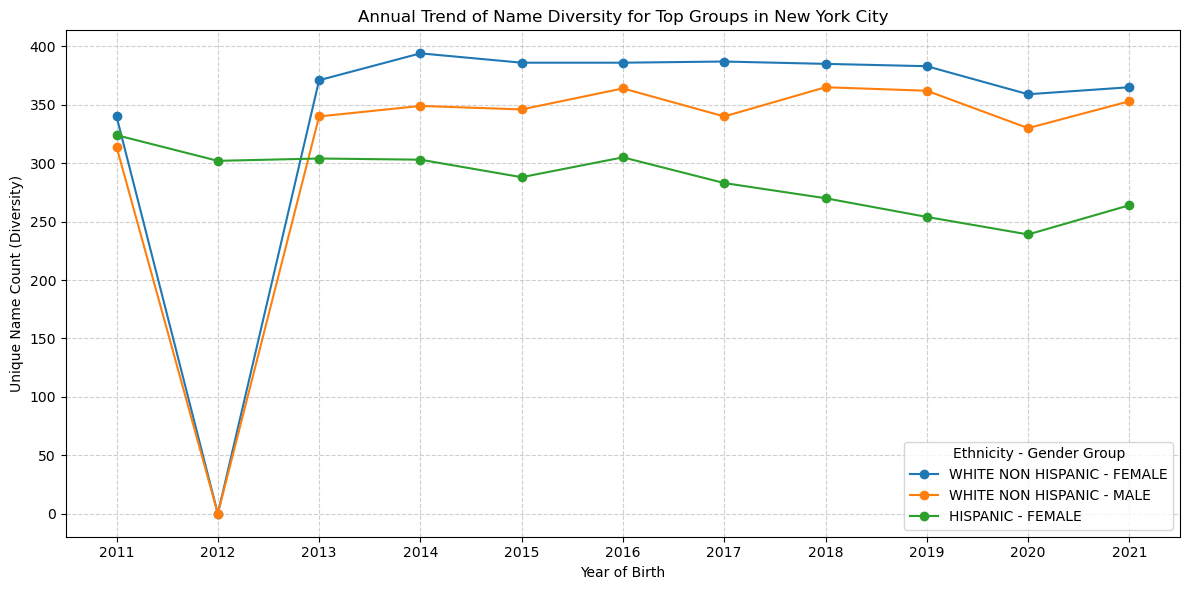

In [10]:
state_name = "New York City"

plt.figure(figsize=(12, 6))

for ethnicity, gender in top_3_groups:
    group_df = df_final_query[(df_final_query['Ethnicity'] == ethnicity) & (df_final_query['Gender'] == gender)]
    label = f"{ethnicity} - {gender}"
    plt.plot(group_df['Year of Birth'], group_df['Unique_Name_Count'], 
             marker='o', linestyle='-', label=label)

plt.xlabel("Year of Birth")
plt.ylabel("Unique Name Count (Diversity)")

plt.title(f"Annual Trend of Name Diversity for Top Groups in {state_name}")

plt.legend(title='Ethnicity - Gender Group')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(df_final_query['Year of Birth'].unique().astype(int))
plt.tight_layout()
plt.show()

Generally, the rate of unique names among the white non-hispanic females, white non-hispanic males, and hispanic females varied in a similar pattern. The white non-hispanic females had the greatest rate of unique names, with white non-hispanic males right behind, and hispanic females with the third highest on this chart. Interestly, in 2012 both the white non-hispanic females and males had a dramatic drop to 0 in unique names with the hispanic females trending normally. This drop should be investigated further since it is very abnormal and may suggest that data was missing for this demographic in 2012.

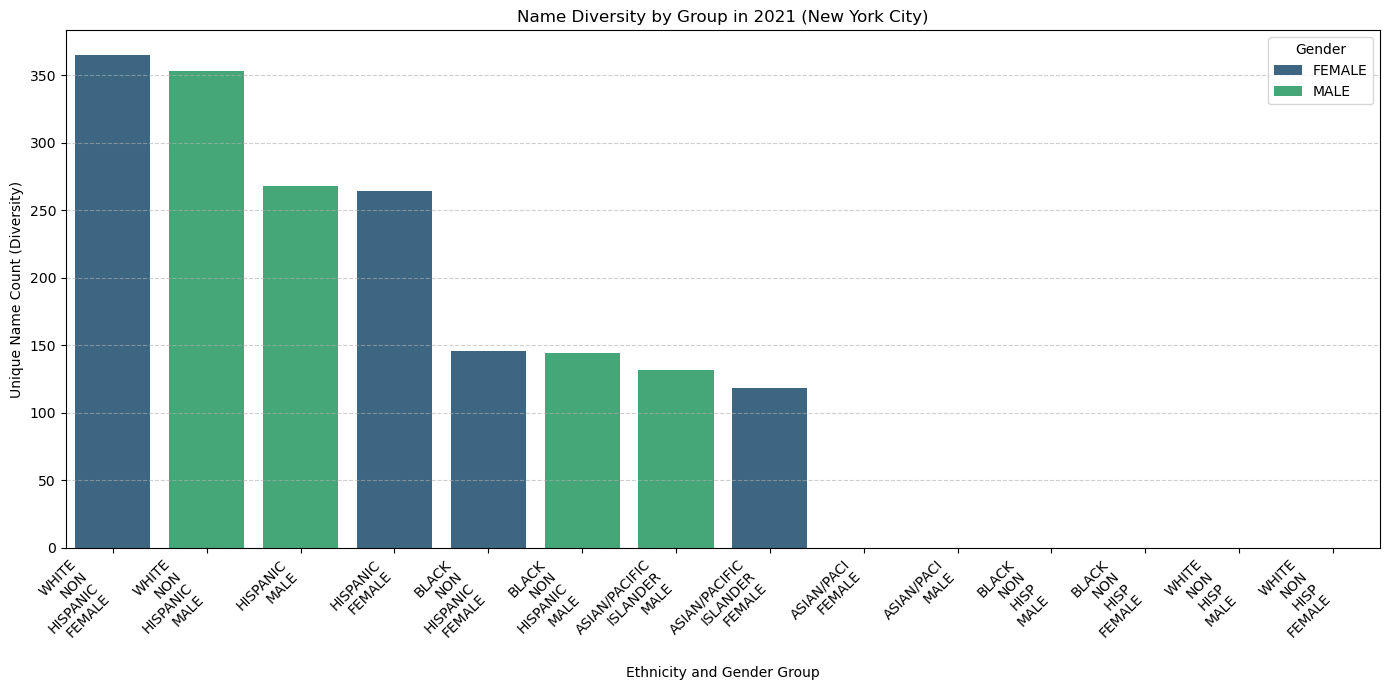

In [13]:
# Filter data for the latest year available
latest_year = df_diversity['Year of Birth'].max()
df_latest = df_diversity[df_diversity['Year of Birth'] == latest_year].sort_values('Unique_Name_Count', ascending=False)

plt.figure(figsize=(14, 7))

# FIX: Ensure columns are converted to string before string operations
df_latest['Group'] = (df_latest['Ethnicity'].astype(str).str.replace(' AND ', '/').str.replace(' ', '\n') + 
                      "\n" + 
                      df_latest['Gender'].astype(str))

# Grouped Bar Chart using Seaborn
sns.barplot(x='Group', y='Unique_Name_Count', data=df_latest, hue='Gender', dodge=False, palette='viridis')

# Proper axis labels and units
plt.xlabel("Ethnicity and Gender Group")
plt.ylabel("Unique Name Count (Diversity)")
state_name = "New York City"
plt.title(f"Name Diversity by Group in {latest_year} ({state_name})")

# Rotate x-axis labels for readability and add legend
plt.xticks(rotation=45, ha='right')
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

This chart shows that the demographic of white non-hispanic females had the most unique names. In addition, the demographic with the second highest number of unique names was the white non-hispanic males. Therefore, this indicates that in this study of NYC baby names,  the overall demographic of white non-hispanic had a greater number of unique names than other races. Another interesting find was that when looking at the order of the demographics that have the most unique names, both the males and females of the races were similar in uniqueness. This indicates that the uniqueness of names is more dependent on race than gender of baby. 